In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('gapminder.csv').dropna()

data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
continent = pd.get_dummies(data['continent'], drop_first=True).astype(int)
data = pd.concat([data,continent], axis = 1)
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,Americas,Asia,Europe,Oceania
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,0,1,0,0
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,0,1,0,0
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,0,1,0,0
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,0,1,0,0
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,0,1,0,0


In [5]:
inputs = ['pop', 'gdpPercap', 'year', 'Americas', 'Asia', 'Europe', 'Oceania']
data[inputs].corr()

,pop,gdpPercap,year,Americas,Asia,Europe,Oceania
pop,1.000000,-0.025600,8.230808e-02,-2.219817e-02,2.459466e-01,-6.062454e-02,-2.334280e-02
gdpPercap,-0.025600,1.000000,2.273181e-01,-3.715837e-03,3.834877e-02,3.809787e-01,1.383432e-01
year,0.082308,0.227318,1.000000e+00,-1.017585e-15,1.403744e-15,2.457989e-15,-4.387178e-15
Americas,-0.022198,-0.003716,-1.017585e-15,1.000000e+00,-2.543436e-01,-2.392372e-01,-5.524946e-02
Asia,0.245947,0.038349,1.403744e-15,-2.543436e-01,1.000000e+00,-2.847707e-01,-6.576498e-02
Europe,-0.060625,0.380979,2.457989e-15,-2.392372e-01,-2.847707e-01,1.000000e+00,-6.185896e-02
Oceania,-0.023343,0.138343,-4.387178e-15,-5.524946e-02,-6.576498e-02,-6.185896e-02,1.000000e+00


In [6]:
train, test = train_test_split(data, test_size=0.3, random_state=2024)

In [7]:
model = sm.OLS(train['lifeExp'], train[inputs]).fit()

Text(0, 0.5, 'Actual')

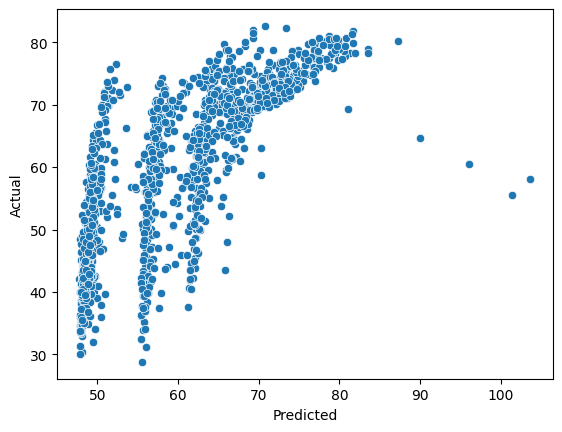

In [8]:
sns.scatterplot(y=train['lifeExp'], x=model.predict(train[inputs]))
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0, 0.5, 'Residual')

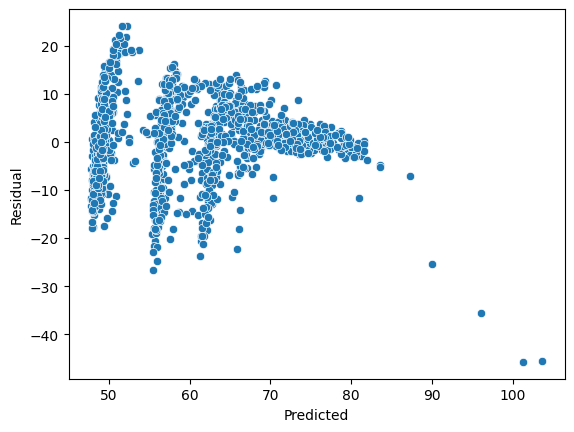

In [9]:
residuals=train['lifeExp'] - model.predict(train[inputs])
sns.scatterplot(y=residuals, x=model.predict(train[inputs]))
plt.xlabel('Predicted')
plt.ylabel('Residual')

Text(0, 0.5, 'Residual')

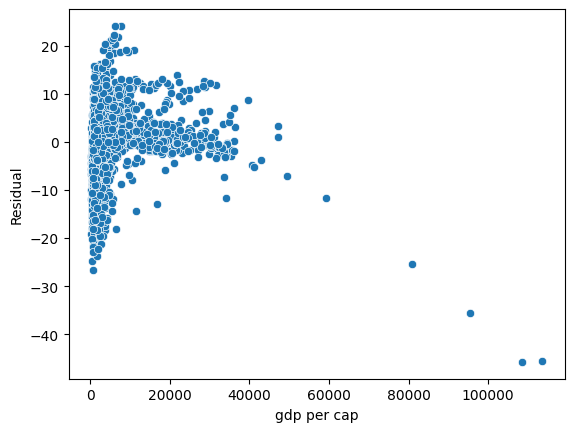

In [10]:
residuals=train['lifeExp'] - model.predict(train[inputs])
sns.scatterplot(y=residuals, x=train['gdpPercap'])
plt.xlabel('gdp per cap')
plt.ylabel('Residual')

In [11]:
data['gdpPercap'] = np.log(data['gdpPercap'])
data['pop'] = np.log(data['pop'])

data['year'] = data['year'] - 1952

In [12]:
train, test = train_test_split(data, test_size=0.3, random_state=2024)

In [13]:
model = sm.OLS(train['lifeExp'], train[inputs]).fit()

Text(0, 0.5, 'Residual')

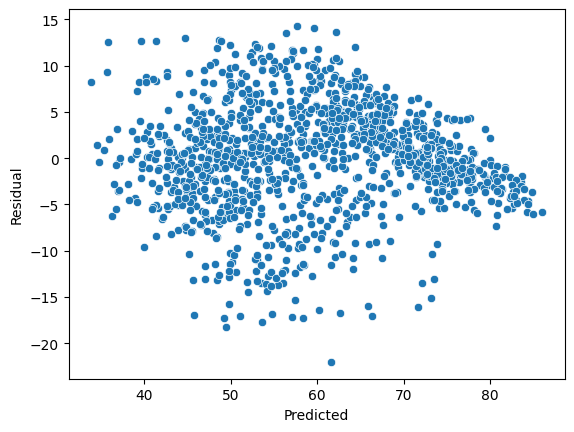

In [14]:
residuals=train['lifeExp'] - model.predict(train[inputs])
sns.scatterplot(y=residuals, x=model.predict(train[inputs]))
plt.xlabel('Predicted')
plt.ylabel('Residual')

In [15]:
from sklearn.metrics import mean_absolute_error


In [16]:
print(mean_absolute_error(y_true=train['lifeExp'], y_pred=model.predict(train[inputs])))
print(mean_absolute_error(y_true=test['lifeExp'], y_pred=model.predict(test[inputs])))

4.3980398014689515
4.582374627265793


In [17]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                lifeExp   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.907e+04
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                        0.00
Time:                        18:11:29   Log-Likelihood:                         -3768.5
No. Observations:                1192   AIC:                                      7551.
Df Residuals:                    1185   BIC:                                      7587.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'Actual')

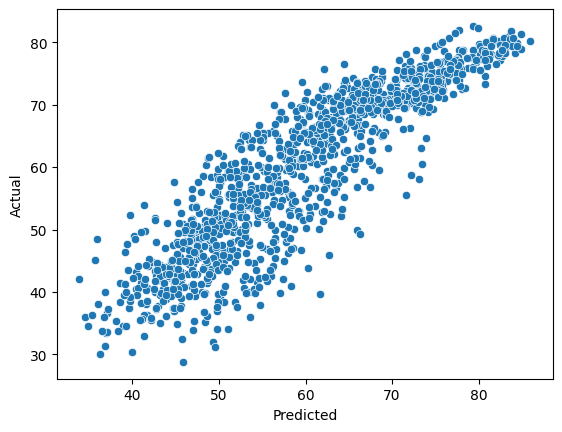

In [18]:
sns.scatterplot(y=train['lifeExp'], x=model.predict(train[inputs]))
plt.xlabel('Predicted')
plt.ylabel('Actual')